In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('package.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


C:\Users\91831\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

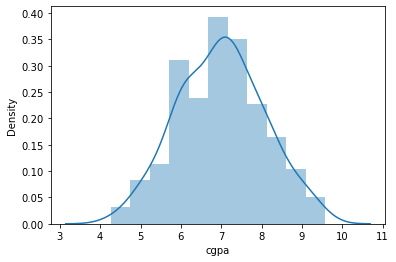

In [4]:
sns.distplot(df['cgpa'])

In [5]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Creating Linear Regression with the help of Class and find  Slop, Intercept Coefficient

In [7]:
class VivekLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))
            
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
        
        
    def predict(self,X_test):
        
        return self.m * X_test + self.b

In [8]:
lr = VivekLR()

In [9]:
lr.fit(X_train,y_train)

0.5623992026328725
-0.9320316217041982


In [10]:
X_train.shape[0]

160

In [11]:
y_pred = lr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score  # for finding accuracy of model

In [19]:
VivekLR_score = r2_score(y_test,y_pred)

#### sklearn Linear Regression 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [17]:
y_pred1 = lr.predict(X_test.reshape(-1,1))

In [20]:
sklearn_score = r2_score(y_test,y_pred)

In [21]:
print("VivekLR score is : ",VivekLR_score)
print("sklearn_score score is : ",sklearn_score)

VivekLR score is :  0.7049180692175041
sklearn_score score is :  0.7049180692175041
